In [1]:
#@title Default title text
unseen_subj =  1628#@param {type:"integer"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from datetime import datetime


!nvidia-smi

Tue Mar 16 11:02:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
project_dir="/content/drive/MyDrive/comp598-II/project"

src_dir=os.path.join(project_dir,"src")
datadir=os.path.join(project_dir,"data/")
npy_dir=os.path.join(project_dir,"data/npy")
result_dir=os.path.join(project_dir,"notebooks/DANN-WISDM/experiments")

import sys
sys.path.append(src_dir)

import dann_v1 as dann

In [4]:
seen_subj = list(range(1600,1605))

In [5]:
save_dir=str(seen_subj[0])+"-"
for s in seen_subj[1:]:
  save_dir+=(str(s)[2:]+"-")

save_dir+=("to-{}".format(unseen_subj))
save_dir=os.path.join(result_dir,save_dir)

try:  
    os.mkdir(save_dir)  
except OSError as error:  
    print(error) 

In [6]:
summary={}

alpha=0.75
batchsize=32
EPOCHS=90
indomain_epoch=20
cv=5

clf_lr= 1e-4
disc_lr=1e-4
ext_lr= 1e-4

act_subset=['Walking',
            'Clapping',
            'Drinking from Cup',
            'Jogging',
            'Brushing Teeth',
            'Typing',
            'Writing',
            'Stairs']

seen_device, unseen_device = "watch", "watch"
seen_sensor, unseen_sensor = "accel", "accel"


with open(os.path.join(datadir,"act_to_int.json"),"r") as jpath:
  act_int_lookup=json.load(jpath)

int_act_lookup={act_int_lookup[key]:key for key in act_int_lookup}

(seen_x,seen_y),(unseen_x,unseen_y),num_class, remapping_dict = dann.load_subjects(npy_dir,
                                                                   seen_subj,
                                                                   seen_device,
                                                                   seen_sensor,
                                                                   unseen_subj,
                                                                   unseen_device,
                                                                   unseen_sensor,
                                                                   act_int_lookup,
                                                                   act_subset)

remapped_int_act_lookup={remapping_dict[key]:int_act_lookup[int(remapping_dict[key])] for key in remapping_dict}
print(remapped_int_act_lookup)

print(seen_x.shape,seen_y.shape)
print(unseen_x.shape,unseen_y.shape)

{0: 'Walking', 1: 'Jogging', 2: 'Stairs', 3: 'Sitting', 4: 'Standing', 5: 'Typing', 6: 'Brushing Teeth', 7: 'Eating Soup'}
(2840, 100, 3) (2840,)
(568, 100, 3) (568,)


In [7]:
summary['alpha']=alpha
summary['batchsize']=batchsize
summary['crossdomain epoch']=EPOCHS
summary['indomain epoch']=indomain_epoch

summary['clf lr']=clf_lr
summary['disc lr']=disc_lr
summary['ext lr']=ext_lr
summary['act']=remapped_int_act_lookup

summary['source subj']=seen_subj
summary['source device']=seen_device
summary['source sensor']=seen_sensor
summary['source data shape']=seen_x.shape
summary['source class dist']=dann.label_breakdown(seen_y)

summary['target subj']=unseen_subj
summary['target device']=unseen_device
summary['target sensor']=unseen_sensor
summary['target data shape']=unseen_x.shape
summary['target class dist']=dann.label_breakdown(unseen_y)

In [8]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain epoch': 90,
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 71, 6: 71, 7: 71},
 'target data shape': (568, 100, 3),
 'target device': 'watch',
 'target sensor': 'accel',
 'target subj': 1628}

epoch 1/90
18/18 [==============================] - 35s 215ms/batch - classifier acc: 0.4079 - classifier loss: 1.5055 - domain acc: 0.4551 - domain_loss: 0.6393
epoch 2/90
18/18 [==============================] - 3s 162ms/batch - classifier acc: 0.5806 - classifier loss: 0.9498 - domain acc: 0.3754 - domain_loss: 0.9131
epoch 3/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.6332 - classifier loss: 0.8402 - domain acc: 0.4952 - domain_loss: 0.8258
epoch 4/90
18/18 [==============================] - 3s 162ms/batch - classifier acc: 0.6464 - classifier loss: 0.7595 - domain acc: 0.4532 - domain_loss: 0.8098
epoch 5/90
18/18 [==============================] - 3s 162ms/batch - classifier acc: 0.7056 - classifier loss: 0.5847 - domain acc: 0.5364 - domain_loss: 0.6458
epoch 6/90
18/18 [==============================] - 3s 162ms/batch - classifier acc: 0.7648 - classifier loss: 0.5037 - domain acc: 0.4068 - domain_loss: 0.6267
epoch 7/90
18/18 [===============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 1/5 ==========================
0.9588028169014085
0.6496478873239436
0.5982003129890454
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1628/crossdomain-1_5.jpg
epoch 1/90
18/18 [==============================] - 3s 169ms/batch - classifier acc: 0.4095 - classifier loss: 1.4797 - domain acc: 0.4028 - domain_loss: 0.6646
epoch 2/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.6497 - classifier loss: 0.8673 - domain acc: 0.4032 - domain_loss: 1.1241
epoch 3/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.6530 - classifier loss: 0.8319 - domain acc: 0.6793 - domain_loss: 0.5761
epoch 4/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.6382 - classifier loss: 0.7800 - domain acc: 0.4508 - domain_loss: 0.7590
epoch 5/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.7138 - classifier loss: 0.734

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 2/5 ==========================
0.9996478873239436
0.6161971830985915
0.6823161189358372
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1628/crossdomain-2_5.jpg
epoch 1/90
18/18 [==============================] - 3s 169ms/batch - classifier acc: 0.3947 - classifier loss: 1.4718 - domain acc: 0.4112 - domain_loss: 0.6184
epoch 2/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.5905 - classifier loss: 0.9751 - domain acc: 0.5599 - domain_loss: 0.6535
epoch 3/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.6793 - classifier loss: 0.7787 - domain acc: 0.3463 - domain_loss: 0.8552
epoch 4/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.6908 - classifier loss: 0.7021 - domain acc: 0.4584 - domain_loss: 0.6545
epoch 5/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.7007 - classifier loss: 0.625

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 3/5 ==========================
0.9908450704225352
0.4242957746478873
0.684076682316119
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1628/crossdomain-3_5.jpg
epoch 1/90
18/18 [==============================] - 3s 169ms/batch - classifier acc: 0.4523 - classifier loss: 1.4440 - domain acc: 0.4979 - domain_loss: 0.6127
epoch 2/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.5707 - classifier loss: 1.0203 - domain acc: 0.4403 - domain_loss: 0.9583
epoch 3/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.6612 - classifier loss: 0.7670 - domain acc: 0.4532 - domain_loss: 0.7999
epoch 4/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.6776 - classifier loss: 0.6806 - domain acc: 0.5318 - domain_loss: 0.5655
epoch 5/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.7204 - classifier loss: 0.6104

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 4/5 ==========================
0.9954225352112676
0.3732394366197183
0.5381455399061033
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1628/crossdomain-4_5.jpg
epoch 1/90
18/18 [==============================] - 3s 168ms/batch - classifier acc: 0.3947 - classifier loss: 1.4499 - domain acc: 0.4395 - domain_loss: 0.7790
epoch 2/90
18/18 [==============================] - 3s 163ms/batch - classifier acc: 0.5888 - classifier loss: 0.9288 - domain acc: 0.4044 - domain_loss: 0.9251
epoch 3/90
18/18 [==============================] - 3s 165ms/batch - classifier acc: 0.6678 - classifier loss: 0.7610 - domain acc: 0.2918 - domain_loss: 0.9403
epoch 4/90
18/18 [==============================] - 3s 165ms/batch - classifier acc: 0.6924 - classifier loss: 0.6812 - domain acc: 0.6924 - domain_loss: 0.5110
epoch 5/90
18/18 [==============================] - 3s 164ms/batch - classifier acc: 0.7056 - classifier loss: 0.662

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 5/5 ==========================
0.9954225352112676
0.5845070422535211
0.6118935837245696
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1628/crossdomain-5_5.jpg


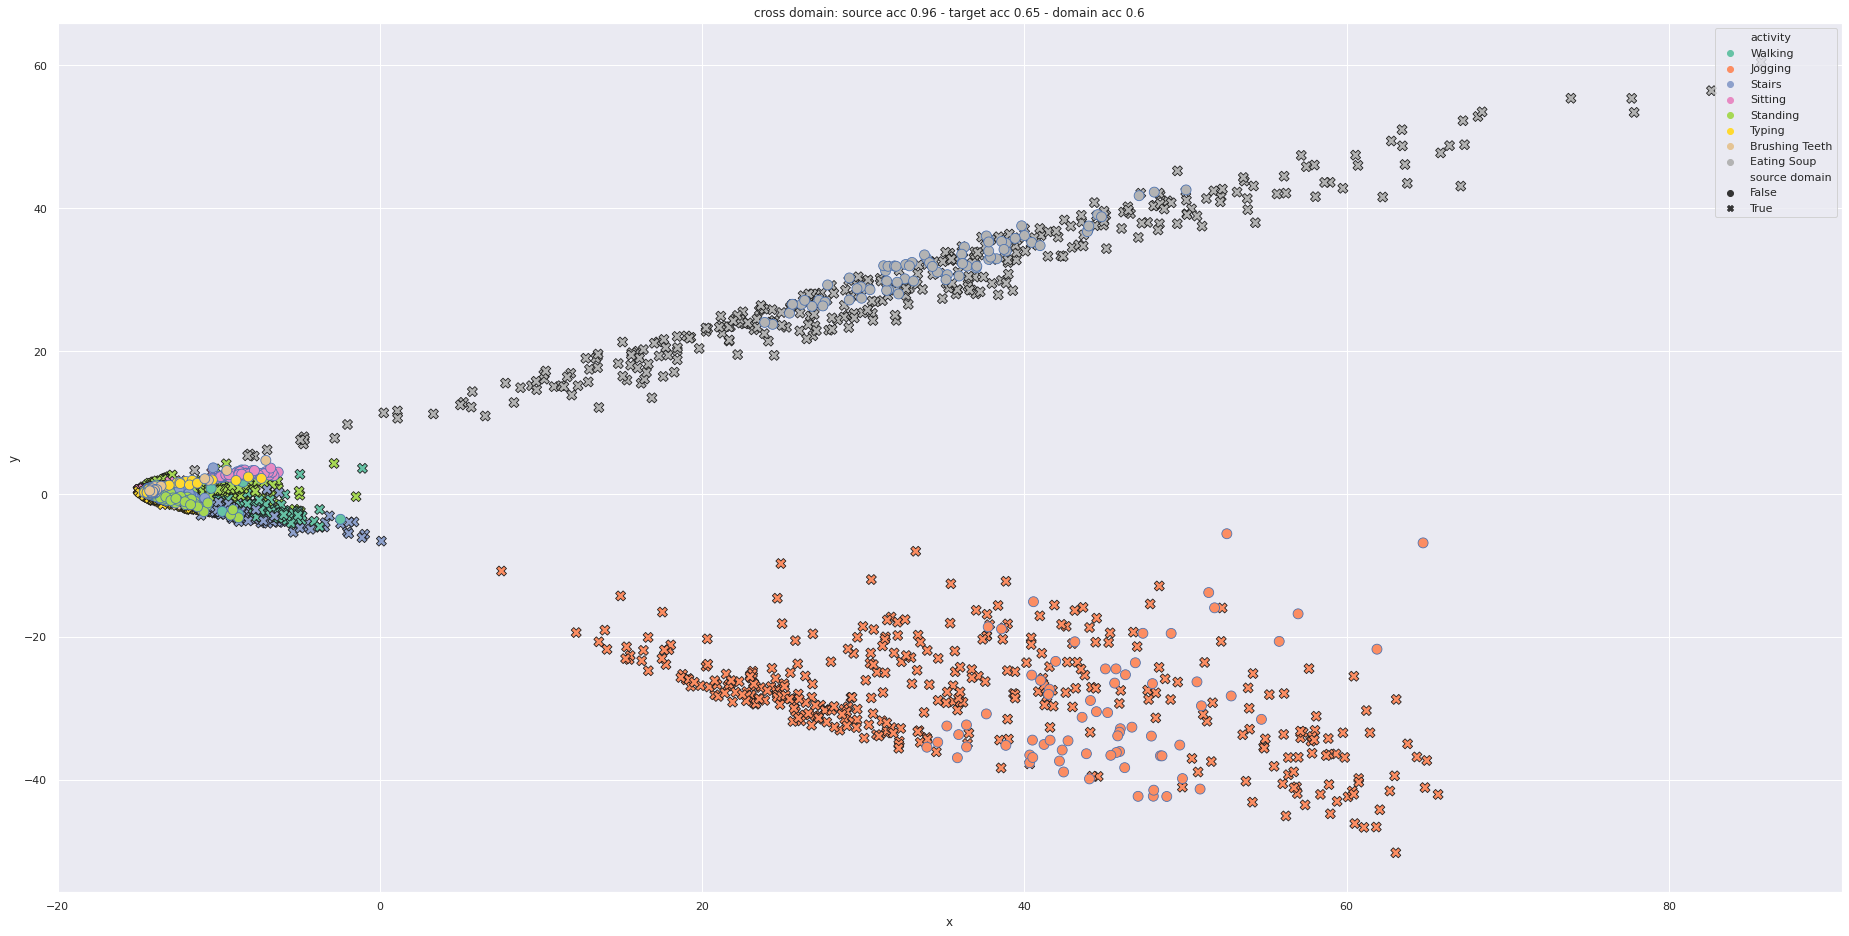

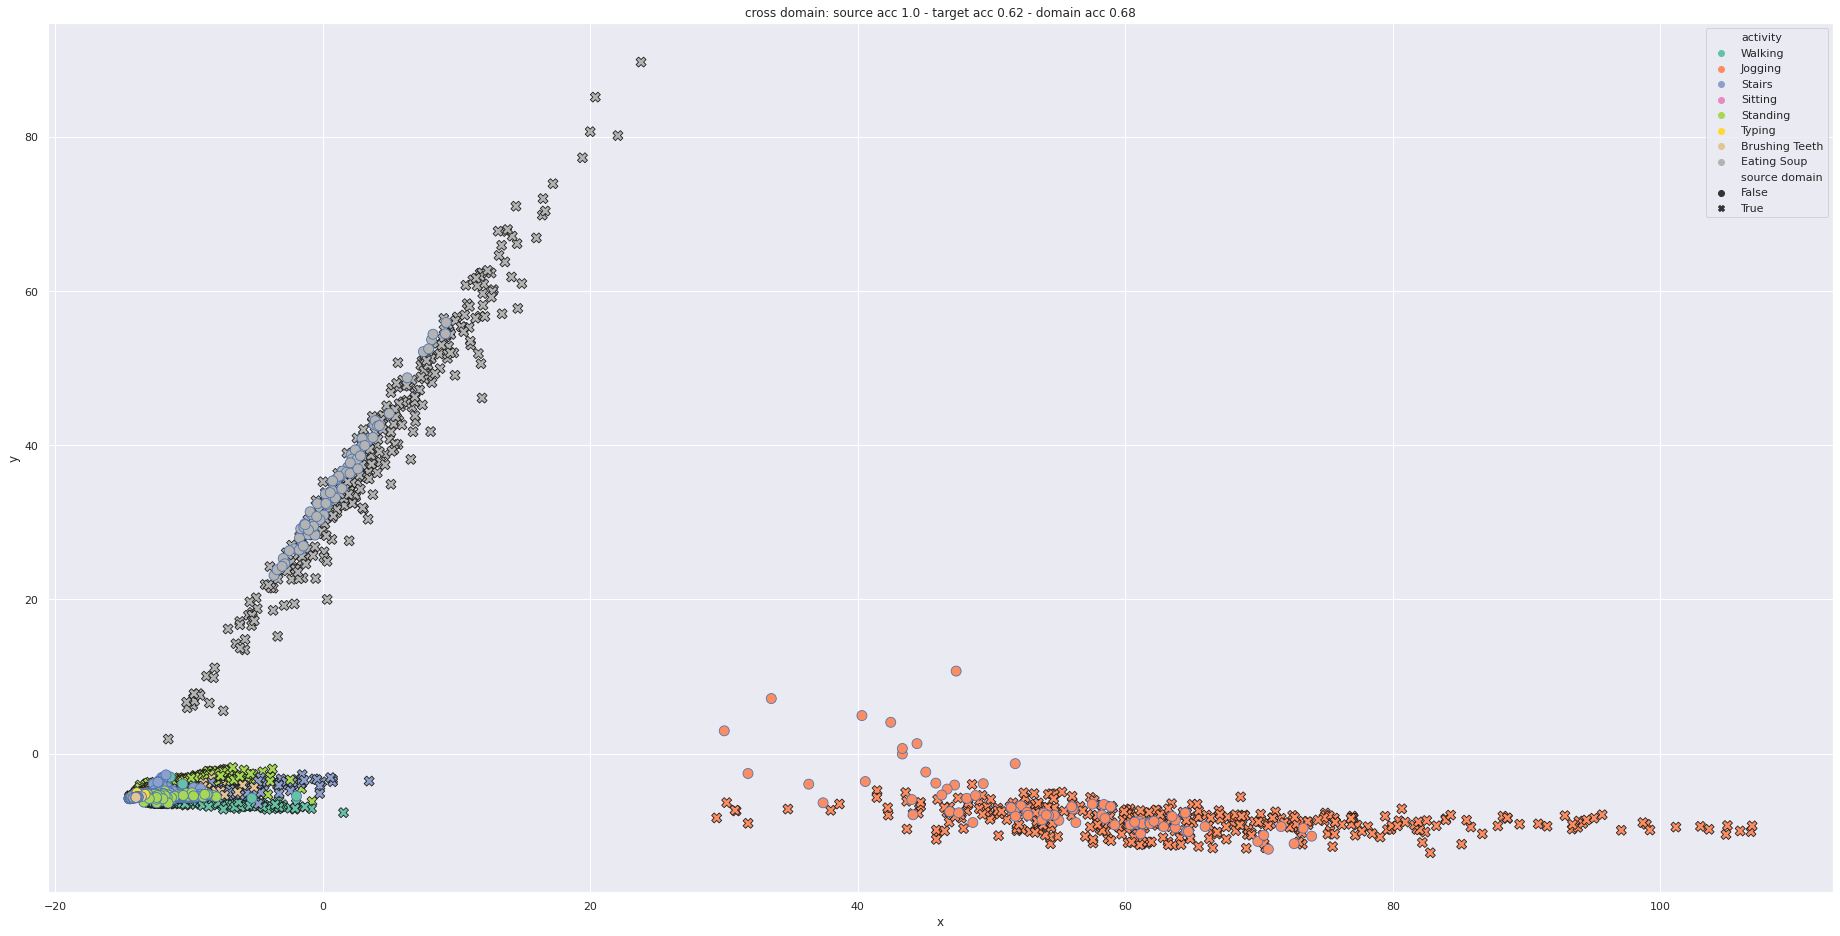

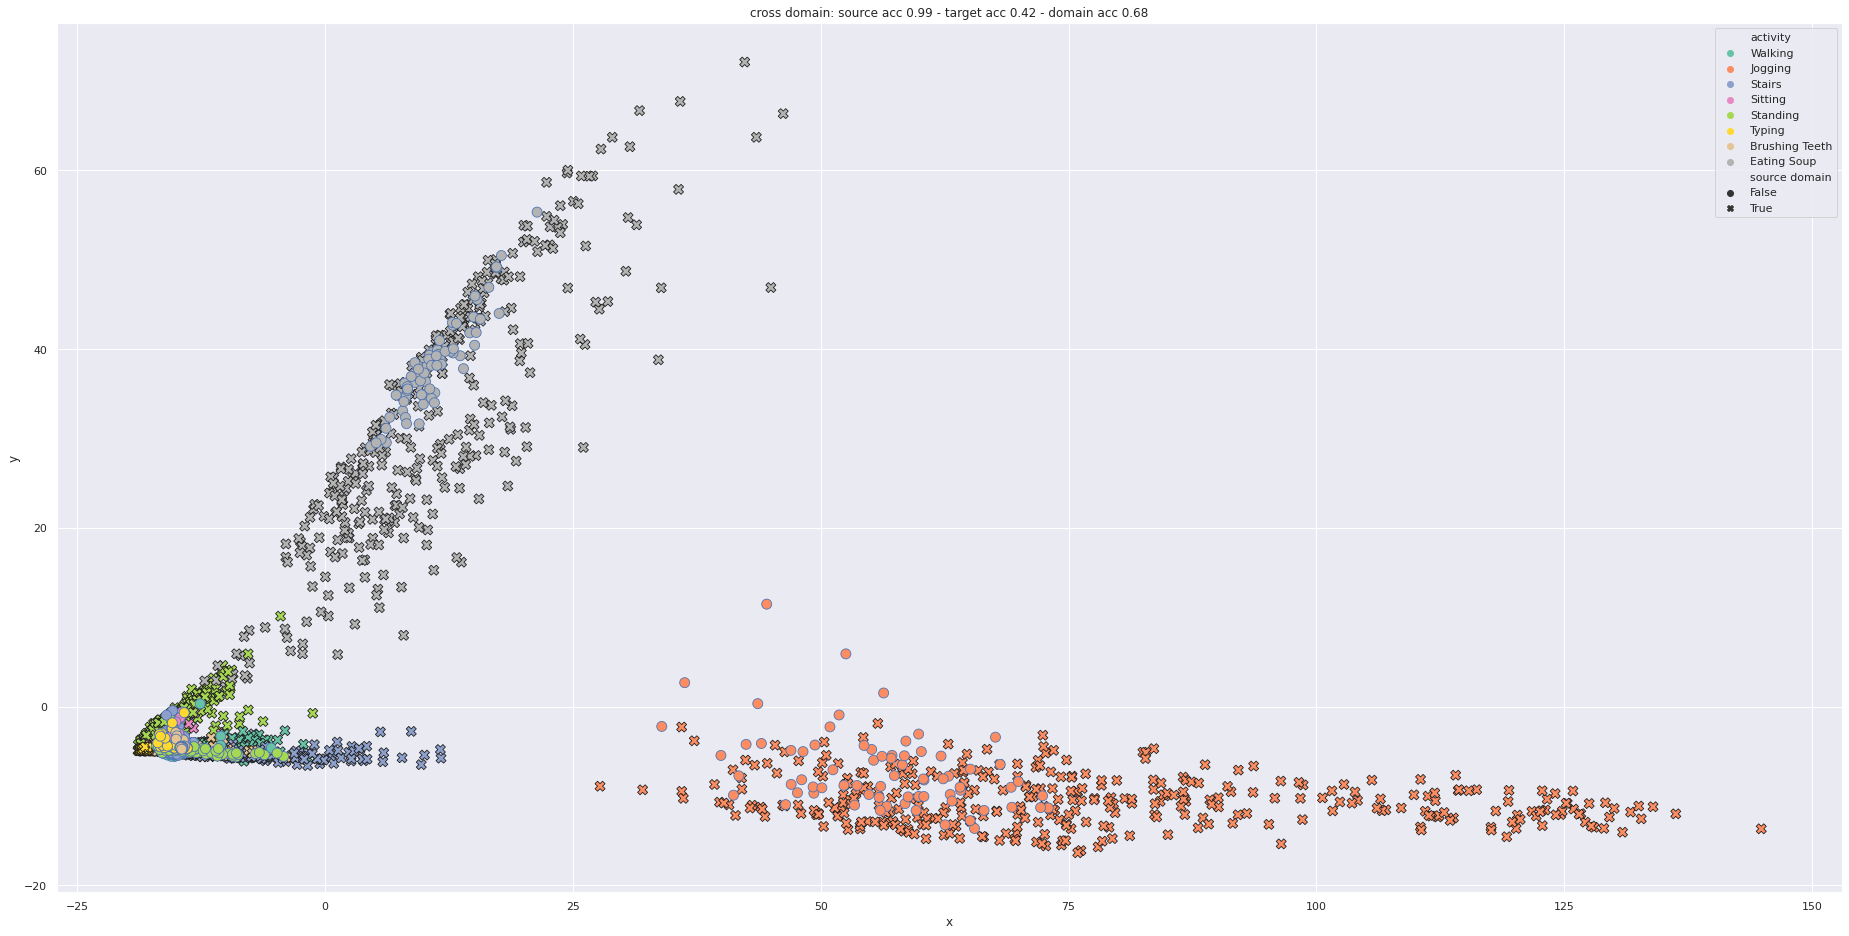

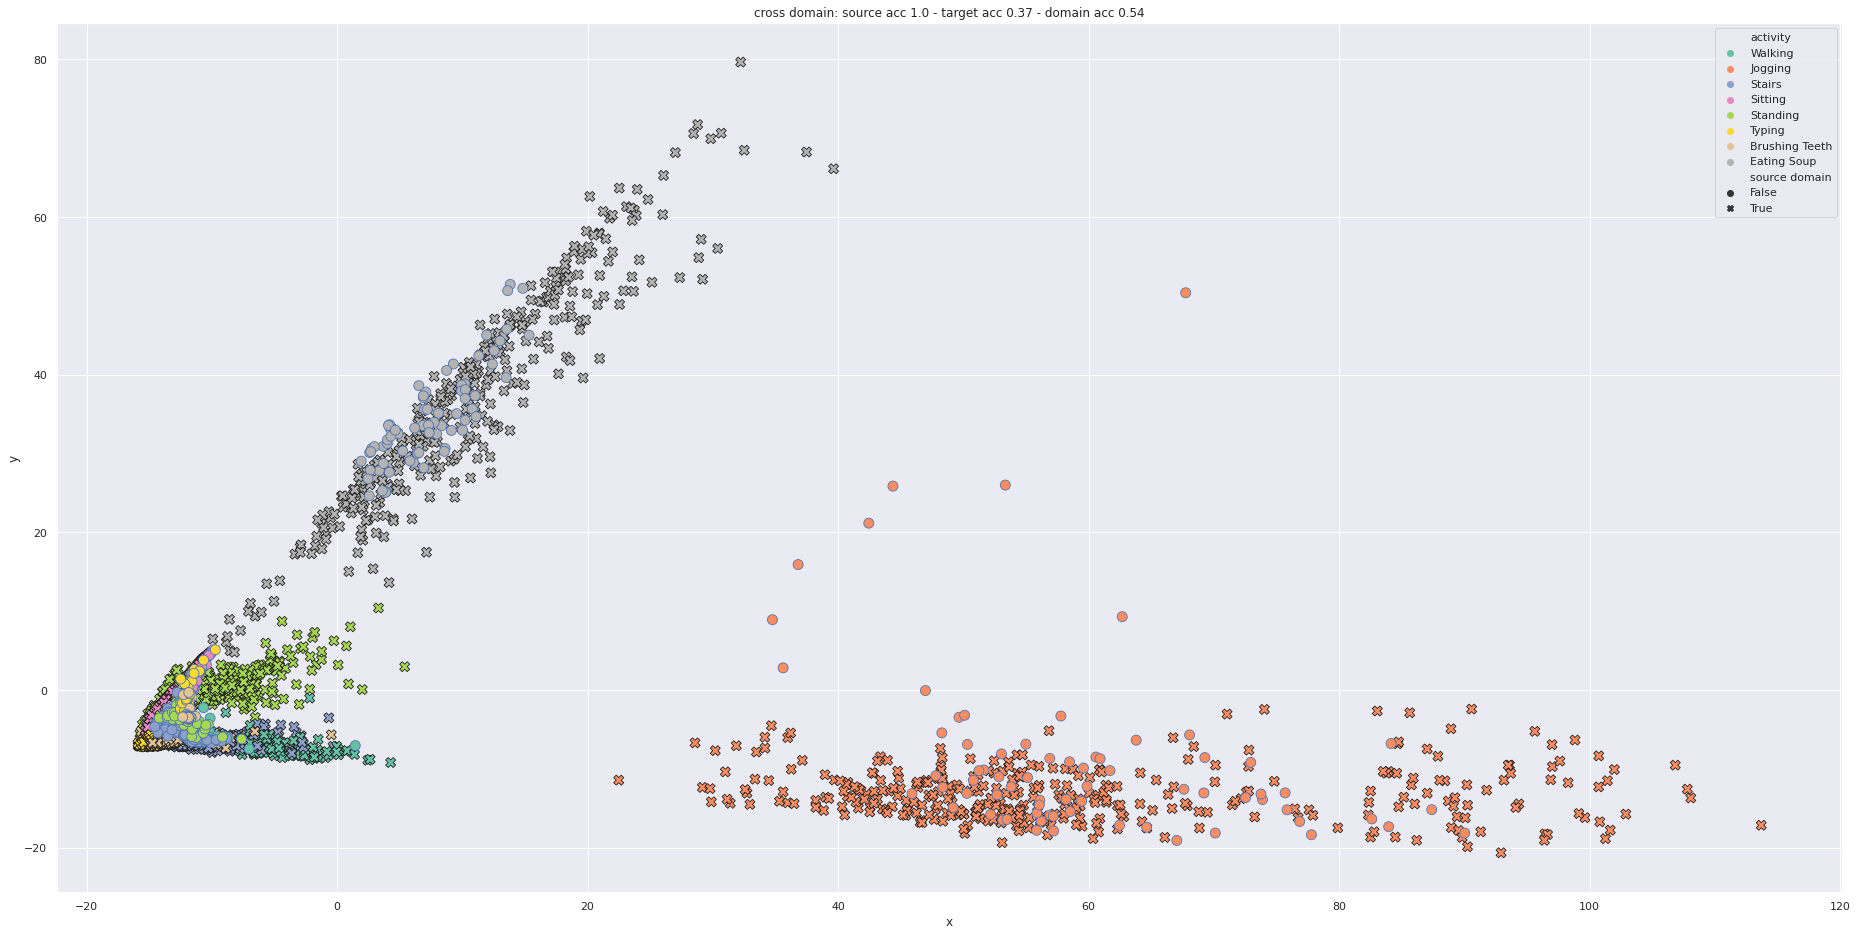

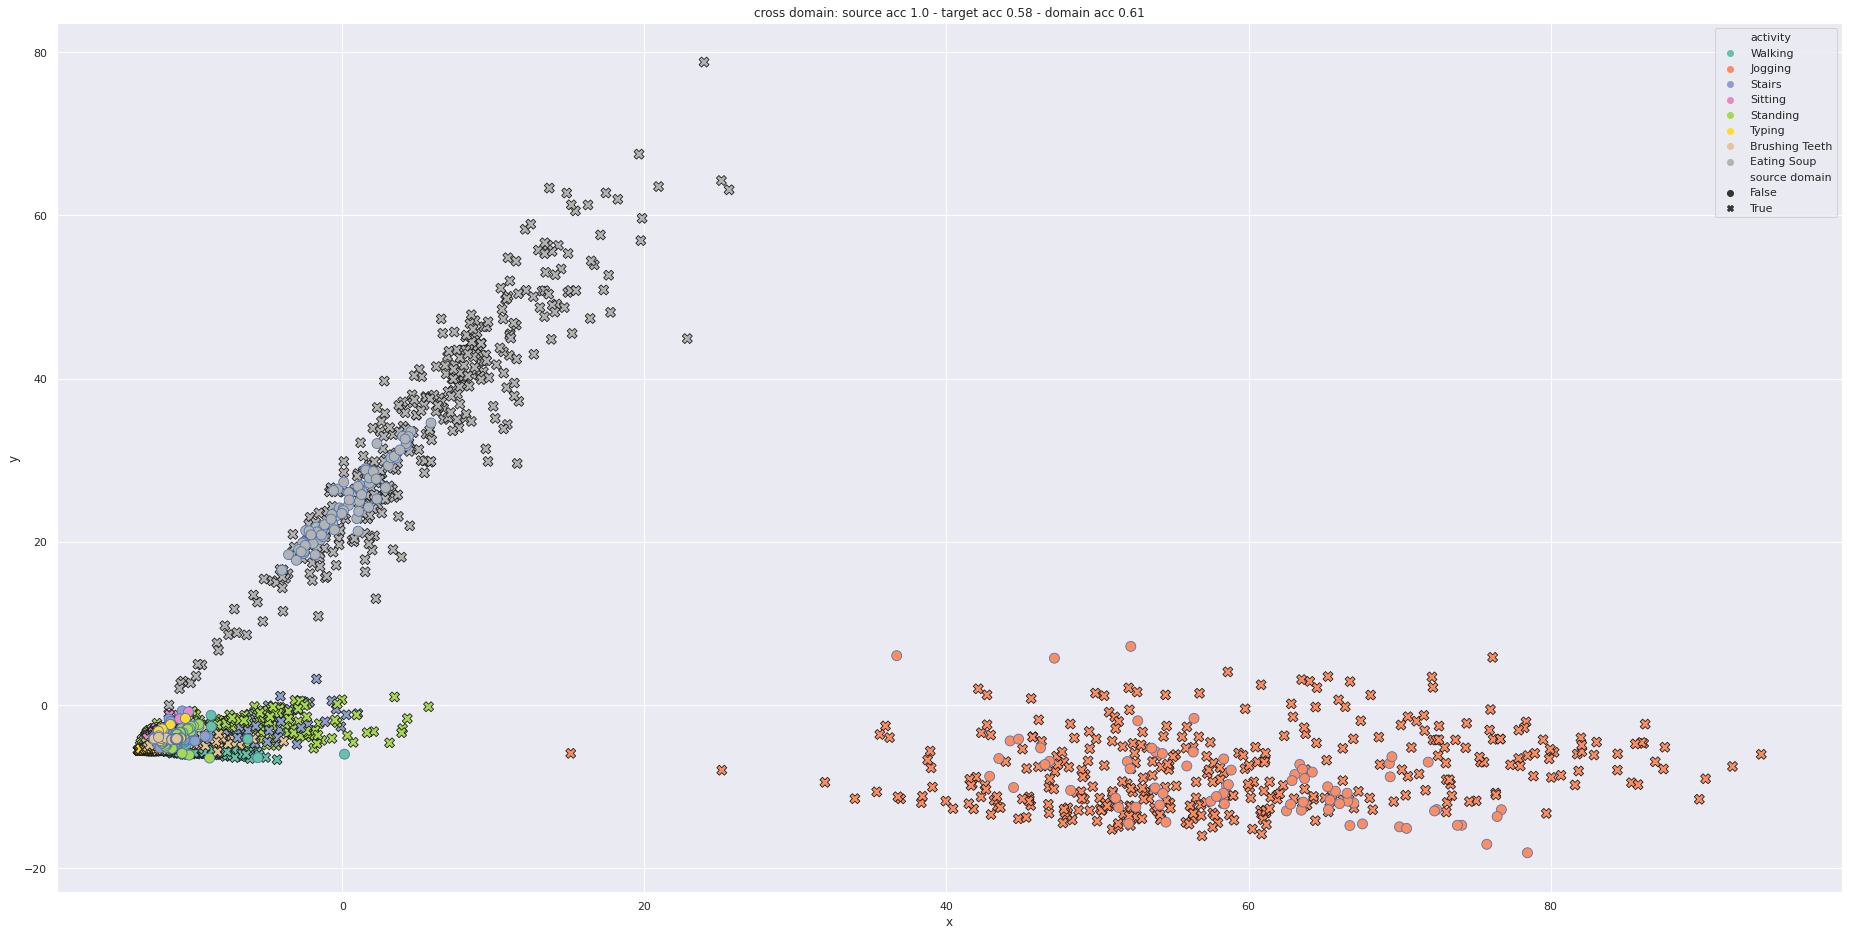

In [9]:
crossdomain_source_acc=[]
crossdomain_target_acc=[]

domain_label_acc=[]

for c in range(cv):
  tf.keras.backend.clear_session()
  crossdomain_model=dann.DANN(alpha=alpha,
                              epochs=EPOCHS,
                              batchsize=batchsize,
                              classifier_lr=clf_lr,
                              extractor_lr=ext_lr,
                              discriminator_lr=disc_lr)

  submodels=dann.submodel_config_march_15(num_class)
  crossdomain_model.set_submodels(submodels)

  crossdomain_model.cross_domain_train(seen_x,seen_y,unseen_x)

  source_acc=crossdomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=crossdomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=crossdomain_model.evaluate_domain_acc(seen_x,unseen_x)

  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  crossdomain_source_acc.append(source_acc)
  crossdomain_target_acc.append(target_acc)
  domain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(crossdomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("cross domain: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="crossdomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)

summary['crossdomain source acc']=crossdomain_source_acc
summary['crossdomain target acc']=crossdomain_target_acc
summary['crossdomain domain acc']=domain_label_acc

In [10]:
print("source domain acc: ",crossdomain_source_acc)
print("avg: ",np.mean(crossdomain_source_acc))
print()
print("target domain acc: ",crossdomain_target_acc)
print("avg: ",np.mean(crossdomain_target_acc))

source domain acc:  [0.9588028169014085, 0.9996478873239436, 0.9908450704225352, 0.9954225352112676, 0.9954225352112676]
avg:  0.9880281690140846

target domain acc:  [0.6496478873239436, 0.6161971830985915, 0.4242957746478873, 0.3732394366197183, 0.5845070422535211]
avg:  0.5295774647887324


In [11]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.5982003129890454,
  0.6823161189358372,
  0.684076682316119,
  0.5381455399061033,
  0.6118935837245696],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.9588028169014085,
  0.9996478873239436,
  0.9908450704225352,
  0.9954225352112676,
  0.9954225352112676],
 'crossdomain target acc': [0.6496478873239436,
  0.6161971830985915,
  0.4242957746478873,
  0.3732394366197183,
  0.5845070422535211],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 

In [12]:
indomain_source_acc=[]
indomain_target_acc=[]
indomain_label_acc=[]

for c in range(cv):
  indomain_model=dann.DANN(alpha=alpha,
                           epochs=indomain_epoch,
                           batchsize=batchsize,
                           classifier_lr=clf_lr,
                           extractor_lr=ext_lr,
                           discriminator_lr=disc_lr)
  
  submodels=dann.submodel_config_march_15(num_class)
  indomain_model.set_submodels(submodels)

  indomain_model.source_domain_train(seen_x,seen_y)

  source_acc=indomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=indomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=indomain_model.evaluate_domain_acc(seen_x,unseen_x)
  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  indomain_source_acc.append(source_acc)
  indomain_target_acc.append(target_acc)
  indomain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(indomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("source domain only: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="indomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)  

  summary['indomain source acc']=indomain_source_acc
  summary['indomain target acc']=indomain_target_acc
  summary['indomain domain acc']=indomain_label_acc

Output hidden; open in https://colab.research.google.com to view.

In [13]:
print("source domain acc: ",indomain_source_acc)
print("avg: ",np.mean(indomain_source_acc))
print()
print("target domain acc: ",indomain_target_acc)
print("avg: ",np.mean(indomain_target_acc))

source domain acc:  [1.0, 0.9926056338028169, 1.0, 1.0, 1.0]
avg:  0.9985211267605634

target domain acc:  [0.4102112676056338, 0.3961267605633803, 0.5105633802816901, 0.40669014084507044, 0.352112676056338]
avg:  0.4151408450704226


In [14]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S %m/%d")

summary['timestamp']=current_time

In [15]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.5982003129890454,
  0.6823161189358372,
  0.684076682316119,
  0.5381455399061033,
  0.6118935837245696],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.9588028169014085,
  0.9996478873239436,
  0.9908450704225352,
  0.9954225352112676,
  0.9954225352112676],
 'crossdomain target acc': [0.6496478873239436,
  0.6161971830985915,
  0.4242957746478873,
  0.3732394366197183,
  0.5845070422535211],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain domain acc': [0.17410015649452268,
  0.23865414710485133,
  0.16666666666666666,
  0.25841158059467917,
  0.719679186228482],
 'indomain epoch': 20,
 'indomain source acc': [1.0, 0.9926056338028169, 1.0, 1.0, 1.0],
 'indomain target acc': [0.4102112676056338,
  0.3961267605633803,
  0.5105633802816901,
  0.4066901

In [16]:
summary_savepath=os.path.join(save_dir,'summary.json')
with open (summary_savepath,'w') as jfile:
  json.dump(summary,jfile)